In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = [14, 8]
plt.rcParams['lines.linewidth'] = 2.5

def plot_results(df, x, hue=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)
    sns.barplot(x=x, y='peak_memory', data=df, ax=ax1, hue=hue)
    ax1.set_title("Peak memory")
    ax1.grid()
    sns.barplot(x=x, y='time', data=df, ax=ax2, hue=hue)
    ax2.set_title("Time")
    ax2.grid()

In [2]:
df = pd.read_json("results/bench_simple_pipeline.json")

In [3]:
# the way the sparse matrix is created by the custom vectorizer produces this density
df['density'] = 10 / df['n_features']

# One transformer with increasing n_features

In all cases `n_samples=1_000_000`: For the following plot:

```py
pipe_est = ([SillyVectorizer(n_features=n_features)] +
            [PassthroughTransformer() for _ in range(n_passthrough)])
pipe = make_pipeline(*pipe_est)
```

where `SillyVectorizer` generates a random sparse matrix and `PassthroughTransformer` passes through the matrix but with converting the input into a scipy sparse matrix and wrapping the output to be consistent with `array_out`:

```py
class PassthroughTransformer(TransformerMixin, BaseEstimator):
    def fit(self, X, y=None):
        X = check_array(X, accept_sparse=True)
        # do some fitting
        return self

    def transform(self, X):
        data_wrap = _ArrayTransformer(X)
        X = check_array(X, accept_sparse=True)
        # typically does some math
        return data_wrap.transform(X)
```

In [4]:
df_1_passthrough = df[df['n_passthrough'] == 1]

# density for each n_features
df_1_passthrough.drop_duplicates(subset=['n_features'])[['n_features', 'density']]

,n_features,density
0,100000,0.000100
15,300000,0.000033
30,500000,0.000020


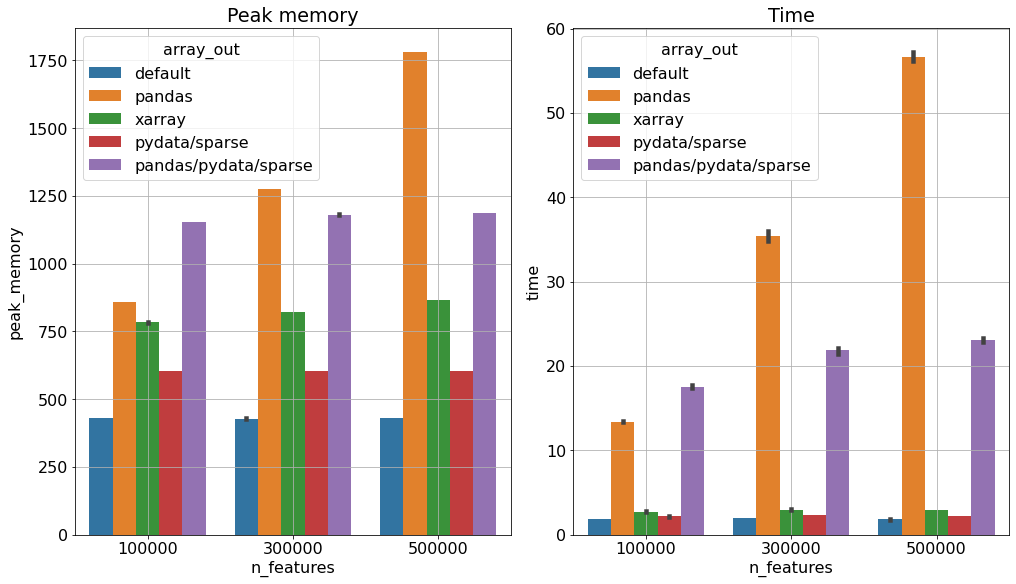

In [5]:
plot_results(df_1_passthrough, x='n_features', hue='array_out')

## Multiple chain transformers

We fix `n_features=300_000`, density in this case is `3.33333333e-05`. Here we chain 1, 2, or 3 `PassthroughTransformer`, which simulate multiple wrapping and unwrapping of the sparse matrix

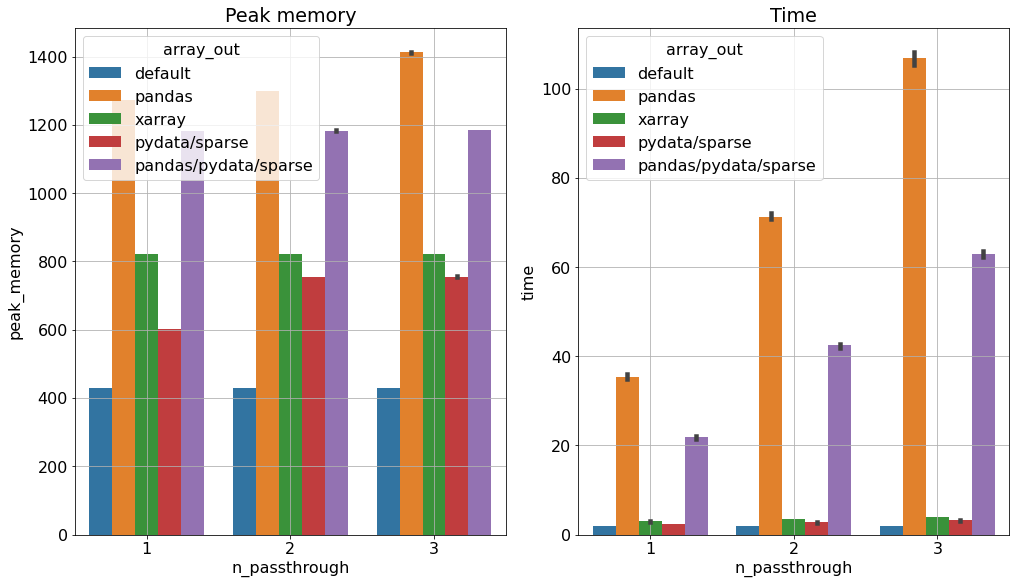

In [6]:
df_n_feature = df[df['n_features'] == 300000]
plot_results(df_n_feature, x='n_passthrough', hue='array_out')

## Without pandas to look at pydata/sparse 

Notice that the default implemenation does not increase in time because the `PassthroughTransformer` is a noop with `array_out='default'`.

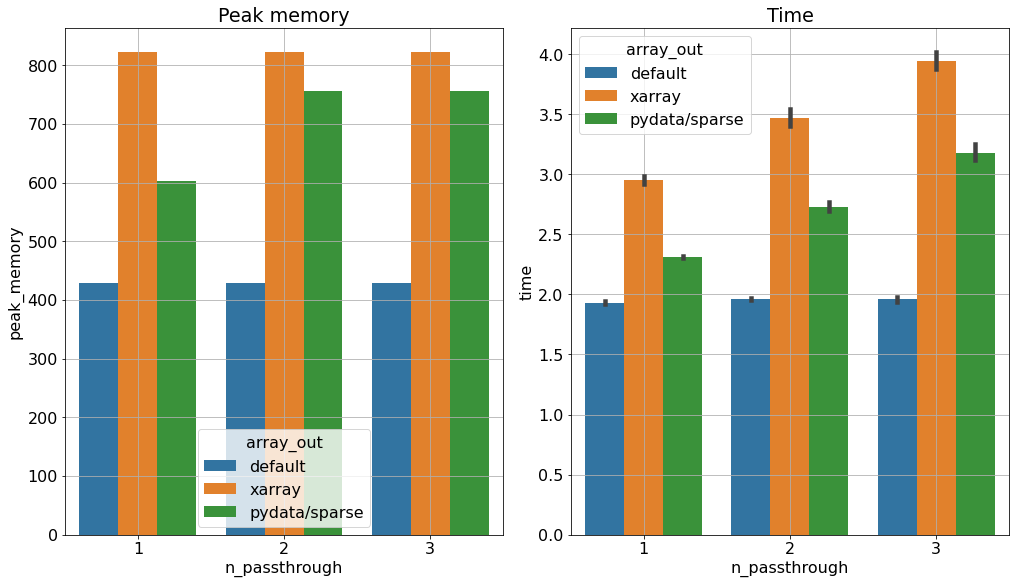

In [7]:
# without pandas
df_no_pandas = df_n_feature[~df_n_feature['array_out'].str.startswith('pandas')]
plot_results(df_no_pandas, x='n_passthrough', hue='array_out')

# More sparse cases with double the density

In [15]:
df = pd.read_csv("results/bench_simple_pipeline2.csv")
df['density'] = 20 / df['n_features']

In [16]:
df_1_passthrough = df[df['n_passthrough'] == 1]

# density for each n_features
df_1_passthrough.drop_duplicates(subset=['n_features'])[['n_features', 'density']]

,n_features,density
0,100000,0.000200
9,300000,0.000067
18,500000,0.000040


Higher density needs more memory and more time when compared to lower densities

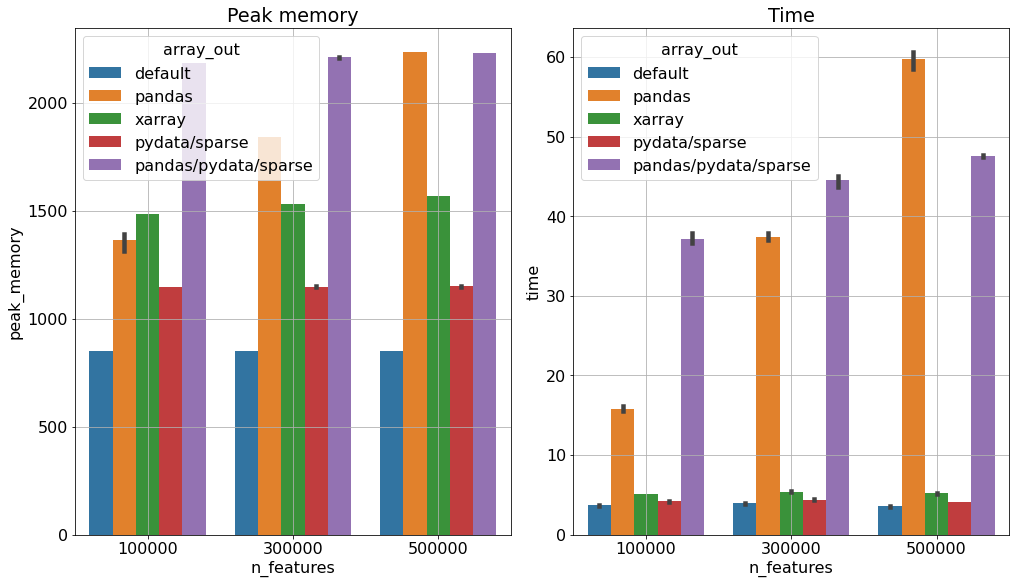

In [17]:
plot_results(df_1_passthrough, x='n_features', hue='array_out')

# Multiple chained transformers with higher density

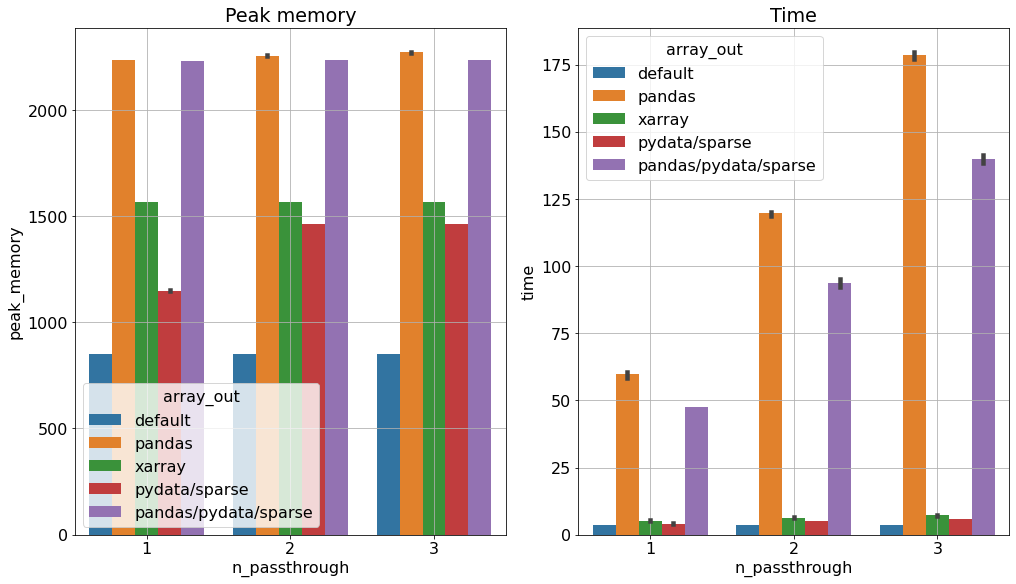

In [19]:
df_n_feature = df[df['n_features'] == 500000]
plot_results(df_n_feature, x='n_passthrough', hue='array_out')

# Multiple chained transformers with higher densities without pandas shown

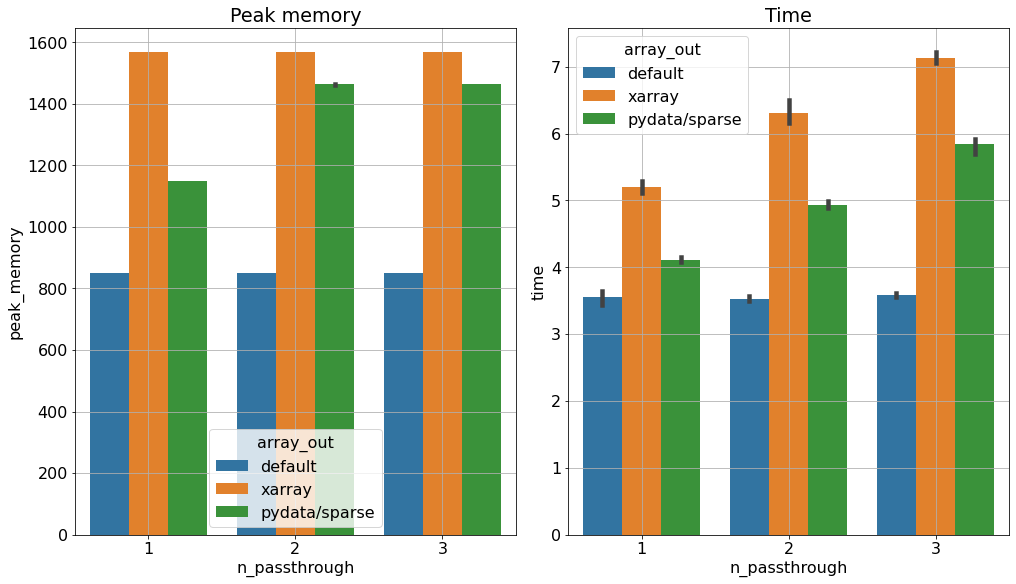

In [20]:
# without pandas
df_no_pandas = df_n_feature[~df_n_feature['array_out'].str.startswith('pandas')]
plot_results(df_no_pandas, x='n_passthrough', hue='array_out')